In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv(r"C:\Users\Admin\Downloads\LoanApprovalPred_Adjusted_v2.csv")


In [2]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,Male,No,0.0,Graduate,No,7066,0.0,109,360,1,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,3189,1508.0,143,360,1,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,No,4073,0.0,83,360,1,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,1997,2358.0,128,360,1,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,5483,0.0,141,360,1,Urban,Y


In [3]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [4]:

data.drop(['Loan_ID'],axis=1,inplace=True)


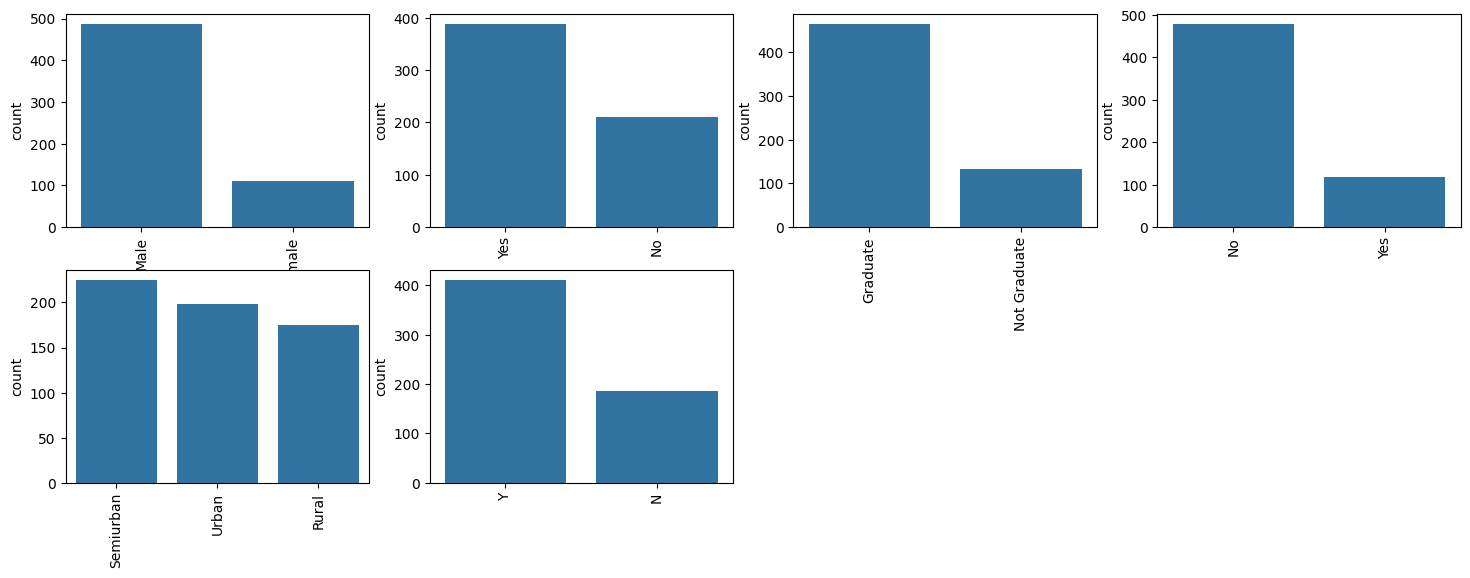

In [5]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
 y = data[col].value_counts() 
 plt.subplot(11,4,index) 
 plt.xticks(rotation=90) 
 sns.barplot(x=list(y.index), y=y) 
 index +=1


In [6]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
 data[col] = label_encoder.fit_transform(data[col])


In [7]:
 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

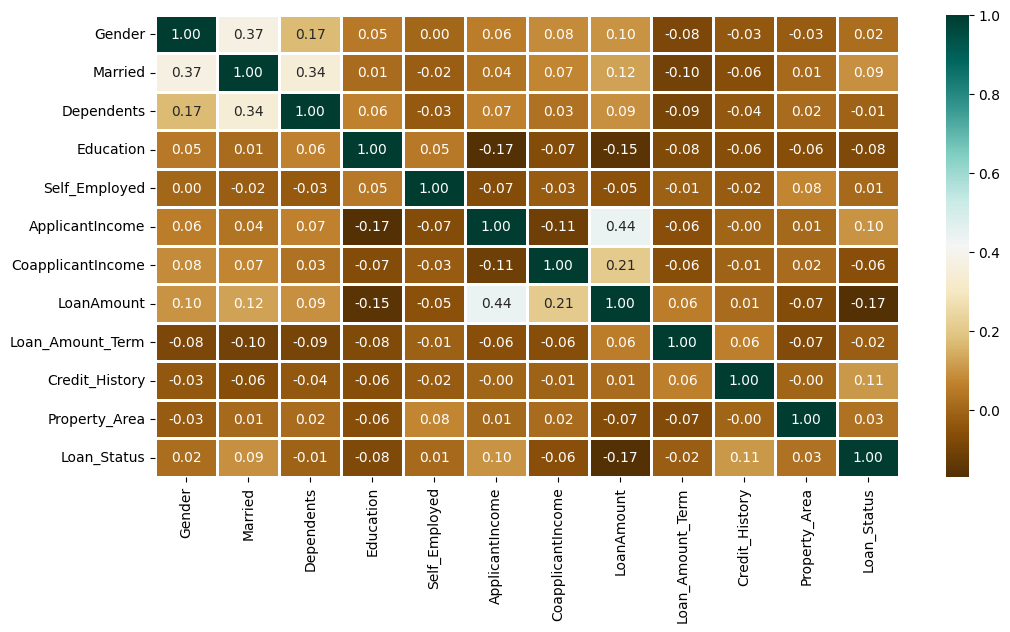

In [8]:
plt.figure(figsize=(12,6)) 

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
			linewidths=2,annot=True)


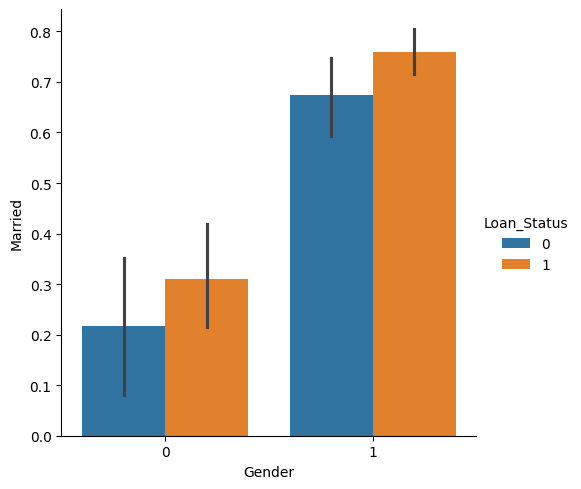

In [9]:
sns.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar", 
			data=data)


In [10]:
for col in data.columns: 
 data[col] = data[col].fillna(data[col].mean()) 
	
data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split 

X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
													test_size=0.4, 
													random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [12]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
rfc = RandomForestClassifier(n_estimators = 7, 
							criterion = 'entropy', 
							random_state =7) 
lc = LogisticRegression(class_weight='balanced')

for clf in (rfc,lc): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_train) 
	print("Accuracy score of ", 
		clf.__class__.__name__, 
		"=",100*metrics.accuracy_score(Y_train, 
										Y_pred))


Accuracy score of  RandomForestClassifier = 96.64804469273743
Accuracy score of  LogisticRegression = 70.6703910614525


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
 
for clf in (rfc,lc): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_test) 
	print("Accuracy score of ", 
		clf.__class__.__name__,"=", 
		100*metrics.accuracy_score(Y_test, 
									Y_pred))


Accuracy score of  RandomForestClassifier = 76.66666666666667
Accuracy score of  LogisticRegression = 62.083333333333336


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
%%writefile loanappr.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\LoanApprovalPred_Adjusted_v2.csv")

# Data preprocessing
df.drop(columns=['Unnamed: 13', '96', 'Loan_ID'], errors='ignore', inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

le = LabelEncoder()
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(le.fit_transform)

# Feature-target split and scaling
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Streamlit UI
st.title("Loan Approval Prediction System")
st.write("Enter applicant details below to predict the loan approval status.")

# Input fields for applicant details
col1, col2 = st.columns(2)

with col1:
    Gender = st.selectbox("Gender", [1, 0], format_func=lambda x: "Male" if x == 1 else "Female")
    Married = st.selectbox("Married", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")
    Dependents = st.number_input("Number of Dependents", min_value=0, max_value=5, step=1)
    Education = st.selectbox("Education", [0, 1], format_func=lambda x: "Graduate" if x == 0 else "Not Graduate")
    Self_Employed = st.selectbox("Self-Employed", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

with col2:
    ApplicantIncome = st.number_input("Applicant Income ", min_value=0.0, step=500.0)
    CoapplicantIncome = st.number_input("Co-applicant Income ", min_value=0.0, step=500.0)
    LoanAmount = st.number_input("Loan Amount (in thousands)", min_value=0.0, step=50.0)
    Loan_Amount_Term = st.number_input("Loan Amount Term (in days)", min_value=0.0, step=12.0)
    Credit_History = st.selectbox("Credit History", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

Property_Area = st.selectbox("Property Area", [0, 1, 2], format_func=lambda x: ["Rural", "Semiurban", "Urban"][x])

# Collect input data
user_input = pd.DataFrame([{
    'Gender': Gender,
    'Married': Married,
    'Dependents': Dependents,
    'Education': Education,
    'Self_Employed': Self_Employed,
    'ApplicantIncome': ApplicantIncome,
    'CoapplicantIncome': CoapplicantIncome,
    'LoanAmount': LoanAmount,
    'Loan_Amount_Term': Loan_Amount_Term,
    'Credit_History': Credit_History,
    'Property_Area': Property_Area
}])

# Prediction button
if st.button("Predict Loan Status"):
    scaled_input = scaler.transform(user_input)  # Scale user input
    prediction = model.predict(scaled_input)  # Predict
    result = "Approved" if prediction[0] == 1 else "Not Approved"
    st.subheader("Prediction Result:")
    st.success(f"The loan is {result}.")




Overwriting loanappr.py
